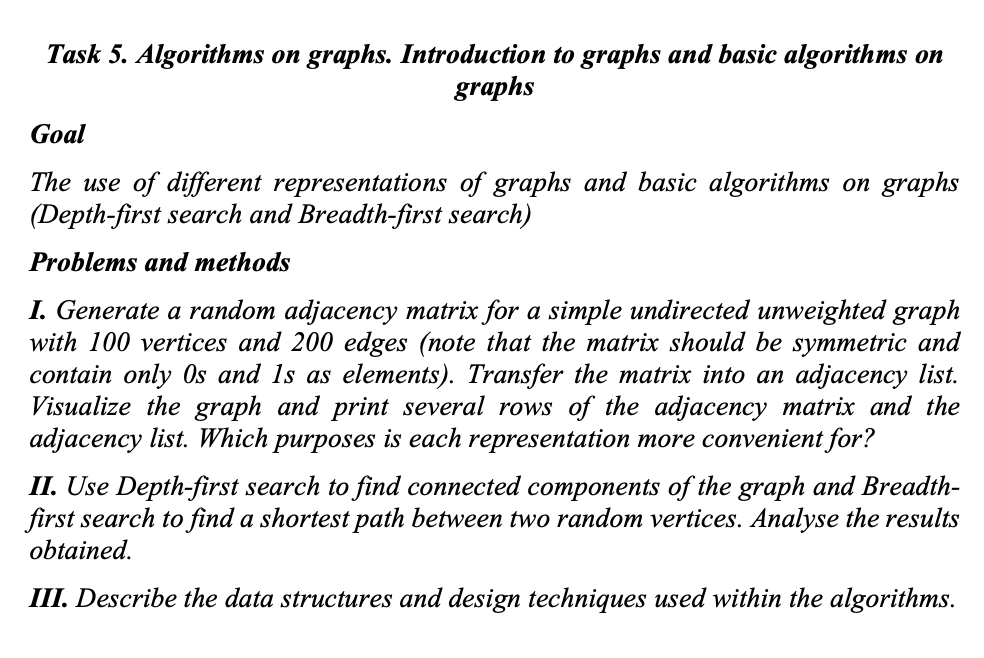

Task 2.

In [2]:
from collections import defaultdict
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [44]:
# generate random adjacency matrix


n = 100

def random_adjacency_matrix(n):   
    matrix = [[random.randint(0, 1) for i in range(n)] for j in range(n)]

    # No vertex connects to itself
    for i in range(n):
        matrix[i][i] = 0

    # If i is connected to j, j is connected to i
    for i in range(n):
        for j in range(n):
            matrix[j][i] = matrix[i][j]

    return matrix

arr = random_adjacency_matrix(n)


# is the matrix symmetric
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    a = np.array(a)
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

check_symmetric(random_adjacency_matrix(n))

print(f'{arr[0]} \n\n')

print(arr[1])

[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0] 


[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1]


Task 1.

In [45]:
from collections import defaultdict

# converts from adjacency matrix to adjacency list
def convert(a):
    adjList = defaultdict(list)
    for i in range(len(a)):
        for j in range(len(a[i])):
                       if a[i][j]== 1:
                           adjList[i].append(j)
    return adjList
 
# driver code


AdjList = convert(arr)
print("Adjacency List:")
# print the adjacency list
for i in AdjList:
    print(i, end ="")
    for j in AdjList[i]:
        print(" -> {}".format(j), end ="")
    print("\n")

Adjacency List:
0 -> 1 -> 2 -> 3 -> 4 -> 9 -> 13 -> 15 -> 16 -> 18 -> 22 -> 24 -> 25 -> 27 -> 28 -> 29 -> 31 -> 32 -> 33 -> 35 -> 36 -> 40 -> 48 -> 50 -> 51 -> 54 -> 57 -> 58 -> 60 -> 62 -> 63 -> 64 -> 67 -> 68 -> 70 -> 71 -> 75 -> 76 -> 77 -> 79 -> 81 -> 84 -> 85 -> 87 -> 88 -> 89 -> 90 -> 92 -> 95 -> 96 -> 97

1 -> 0 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 11 -> 13 -> 15 -> 16 -> 18 -> 19 -> 20 -> 24 -> 26 -> 28 -> 36 -> 38 -> 39 -> 40 -> 43 -> 47 -> 48 -> 49 -> 53 -> 57 -> 60 -> 64 -> 68 -> 69 -> 73 -> 78 -> 80 -> 81 -> 84 -> 86 -> 87 -> 88 -> 90 -> 92 -> 94 -> 99

2 -> 0 -> 3 -> 4 -> 5 -> 8 -> 9 -> 10 -> 12 -> 15 -> 19 -> 20 -> 22 -> 25 -> 26 -> 27 -> 30 -> 31 -> 32 -> 33 -> 34 -> 35 -> 43 -> 44 -> 46 -> 47 -> 53 -> 55 -> 57 -> 59 -> 61 -> 62 -> 64 -> 67 -> 68 -> 70 -> 75 -> 76 -> 80 -> 82 -> 85 -> 90 -> 94 -> 95 -> 96 -> 97

3 -> 0 -> 1 -> 2 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 14 -> 17 -> 19 -> 20 -> 21 -> 24 -> 26 -> 27 -> 31 -> 32 -> 33 -> 35 -> 38 -> 41 -> 46 -> 48 -> 49 -> 52 -> 5

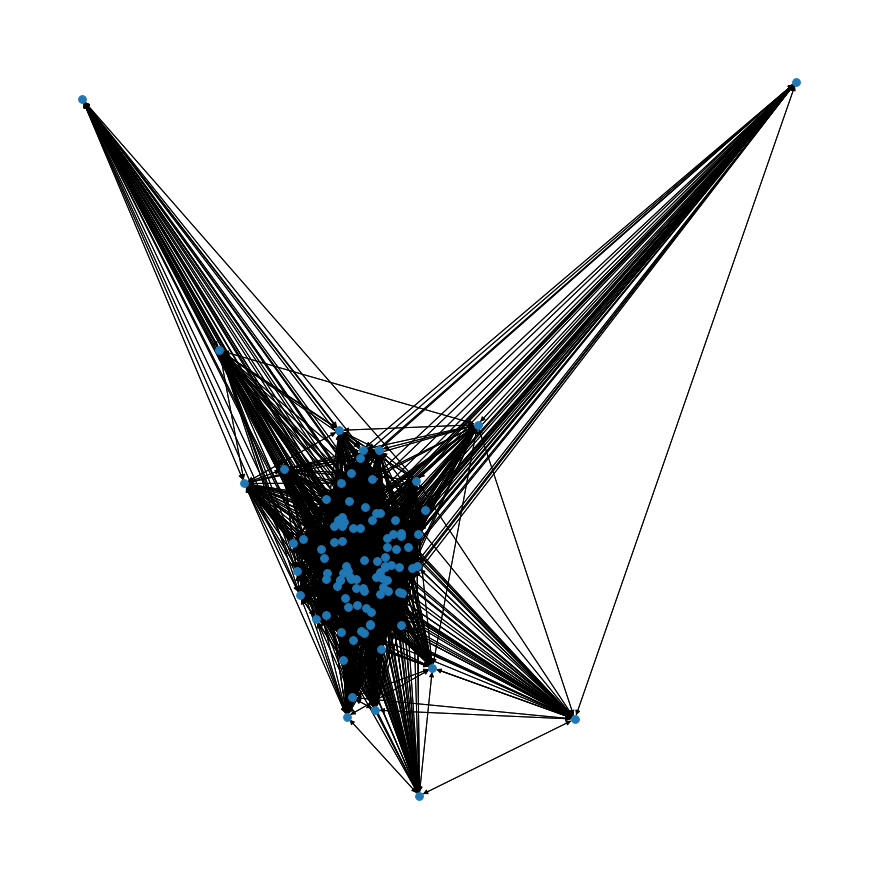

In [50]:
plt.figure(2,figsize=(12,12)) 
nx.draw_spectral(G, node_size=60)

In [47]:
def DFSUtil(temp, v, visited):
 
        # Mark the current vertex as visited
        visited[v] = True
 
        # Store the vertex to list
        temp.append(v)
 
        # Repeat for all vertices adjacent
        # to this vertex v
        for i in arr[v]:
            if visited[i] == False:
 
                # Update the list
                temp = DFSUtil(temp, i, visited)
        return temp


def connectedComponents(n):
        visited = []
        cc = []
        for i in range(n):
            visited.append(False)
        for v in range(n):
            if visited[v] == False:
                temp = []
                cc.append(DFSUtil(temp, v, visited))
        return cc
    
cc = connectedComponents(n)
print("Following are connected components")
print(cc)

Following are connected components
[[0, 1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99]]


In [64]:
# Python3 code for printing shortest path between
# two vertices of unweighted graph


# a modified version of BFS that stores predecessor
# of each vertex in array p
# and its distance from source in array d
def BFS(adj, src, dest, v, pred, dist):

    # a queue to maintain queue of vertices whose
    # adjacency list is to be scanned as per normal
    # DFS algorithm
    queue = []

    # boolean array visited[] which stores the
    # information whether ith vertex is reached
    # at least once in the Breadth first search
    visited = [False for i in range(v)];

    # initially all vertices are unvisited
    # so v[i] for all i is false
    # and as no path is yet constructed
    # dist[i] for all i set to infinity
    for i in range(v):
        dist[i] = 1000000
        pred[i] = -1;

    # now source is first to be visited and
    # distance from source to itself should be 0
    visited[src] = True;
    dist[src] = 0;
    queue.append(src);

    # standard BFS algorithm
    while (len(queue) != 0):
        u = queue[0];
        queue.pop(0);
        for i in range(len(adj[u])):

            if (visited[adj[u][i]] == False):
                visited[adj[u][i]] = True;
                dist[adj[u][i]] = dist[u] + 1;
                pred[adj[u][i]] = u;
                queue.append(adj[u][i]);
                
                # We stop BFS when we find
                # destination.
                if (adj[u][i] == dest):
                    return True;

    return False;

# utility function to print the shortest distance
# between source vertex and destination vertex
def printShortestDistance(adj, s, dest, v):

    # predecessor[i] array stores predecessor of
    # i and distance array stores distance of i
    # from s
    pred=[0 for i in range(v)]
    dist=[0 for i in range(v)];

    if (BFS(adj, s, dest, v, pred, dist) == False):
        print("Given source and destination are not connected")

    # vector path stores the shortest path
    path = []
    crawl = dest;
    path.append(crawl);
    
    while (pred[crawl] != -1):
        path.append(pred[crawl]);
        crawl = pred[crawl];


    # distance from source is in distance array
    print("Shortest path length is : " + str(dist[dest]), end = '')

    # printing path from source to destination
    print("\nPath is : ")
    
    for i in range(len(path)-1, -1, -1):
        print(path[i], end=' ')
    
# Driver program to test above functions
if __name__=='__main__':
    
    # no. of vertices
    v = 100;
    
    source = 25
    dest = 43
    
    printShortestDistance(AdjList, source, dest, v);

Shortest path length is : 1
Path is : 
25 43 